In [3]:
import psycopg2
import pandas as pd

In [4]:
con = psycopg2.connect(database="mid_term_project", user="lhl_student", password="lhl_student", host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com", port="5432")
print("Database opened successfully")
cur = con.cursor()

Database opened successfully


In [1]:
def execute_query(query_string, return_pandas=True):
    if return_pandas:
        response = pd.read_sql_query(query_string, con)
    else:
        cur.execute(query_string)
        response = cur.fetchall()
    return response

In [5]:
query = """
SELECT count(*)
FROM flights;
"""
execute_query(query)

,count
0,15927485


In [18]:
df_flight=execute_query(query)

In [9]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-05,WN,WN,WN,748,WN,N7820L,748,12339,IND,...,837.0,8.0,0.0,0.0,0.0,57.0,None,None,None,None
1,2019-12-05,WN,WN,WN,973,WN,N436WN,973,12339,IND,...,837.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,2019-12-05,WN,WN,WN,231,WN,N775SW,231,12391,ISP,...,220.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,2019-12-05,WN,WN,WN,543,WN,N470WN,543,12391,ISP,...,220.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,2019-12-05,WN,WN,WN,732,WN,N450WN,732,12391,ISP,...,220.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None


In [25]:
query = """
SELECT min(fl_date), max(fl_date)
FROM flights;
"""
execute_query(query)

,min,max
0,2018-01-01,2019-12-31


In [26]:
query = """
SELECT * FROM flights WHERE (fl_date BETWEEN '2018-12-15'AND '2019-01-15') OR (fl_date BETWEEN '2018-01-01' AND '2018-01-15') OR (fl_date BETWEEN '2019-12-15' AND '2019-12-31')"""
execute_query(query)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,10529,BDL,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-01,AA,AA_CODESHARE,AA,5607,OH,N254PS,5607,11278,DCA,...,313.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-01-01,AA,AA_CODESHARE,AA,5608,OH,N710PS,5608,11278,DCA,...,396.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-01-01,AA,AA_CODESHARE,AA,5610,OH,N515AE,5610,13931,ORF,...,290.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328668,2019-12-25,UA,UA,UA,2054,UA,N77510,2054,14057,PDX,...,550.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1328669,2019-12-25,UA,UA,UA,2053,UA,N815UA,2053,12266,IAH,...,1597.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1328670,2019-12-25,UA,UA,UA,2052,UA,N427UA,2052,14908,SNA,...,846.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1328671,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,...,225.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [27]:
df_flights = execute_query(query)

In [29]:
df_flights.shape

(1328673, 42)

In [30]:
query = """
SELECT * FROM passengers"""
df_passengers = execute_query(query)

,count
0,2350497


In [47]:
query = """
SELECT * FROM passengers"""
df_passengers = execute_query(query)

In [39]:
df_fuel.to_csv('fuel_comsumption.csv')

In [35]:
query = """
SELECT * FROM fuel_comsumption"""
df_fuel = execute_query(query)

In [36]:
df_fuel.shape

(3035, 25)

In [44]:
query = """
SELECT * FROM flights_test"""
df_flights_test = execute_query(query)

In [48]:
df_flights_test.shape

(660556, 20)

In [49]:
df_passengers.shape

(2350497, 38)

In [50]:
df_flights.to_csv('flights.csv')

In [52]:
df_flights.isnull().sum()

fl_date                      0
mkt_unique_carrier           0
branded_code_share           0
mkt_carrier                  0
mkt_carrier_fl_num           0
op_unique_carrier            0
tail_num                  1355
op_carrier_fl_num            0
origin_airport_id            0
origin                       0
origin_city_name             0
dest_airport_id              0
dest                         0
dest_city_name               0
crs_dep_time                 0
dep_time                 10676
dep_delay                10968
taxi_out                 11019
wheels_off               11012
wheels_on                11807
taxi_in                  11814
crs_arr_time                 0
arr_time                 11807
arr_delay                14489
cancelled                    0
cancellation_code      1028710
diverted                     0
dup                          0
crs_elapsed_time             0
actual_elapsed_time      14382
air_time                 14382
flights                      0
distance

In [53]:
df_flights['arr_delay']

0           -3.0
1            6.0
2           14.0
3          -12.0
4          -14.0
           ...  
1328668    198.0
1328669     -6.0
1328670      1.0
1328671      NaN
1328672      NaN
Name: arr_delay, Length: 1328673, dtype: float64

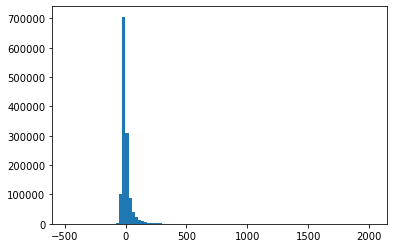

In [58]:
import matplotlib.pyplot as plt
plt.hist(df_flights['arr_delay'],bins=100)
plt.show()

In [ ]:
query = """
SELECT * FROM flights WHERE (fl_date BETWEEN '2019-01-01'AND '2019-12-31') """
flight_2019 = execute_query(query)
flight_2019.to_csv('flights_2019')